In [73]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools, AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
dye_df = pd.read_csv('Data/dye_ecfp6.csv', index_col=0)
print(f"Dye shape: {dye_df.shape}")

device_df = pd.read_csv('Data/device_oneHot.csv', index_col=0)
print(f"Device shape: {device_df.shape}")

device_family_df = pd.read_csv('Data/device_oneHot_mk.csv', index_col=0)


dye_info = pd.read_csv('Data/fp_dye.csv', index_col=0)
activity_df = pd.read_csv('Data/fp_activity.csv', index_col=0)
activity_df.shape

Dye shape: (2007, 1024)
Device shape: (2007, 38)


(2007, 4)

In [75]:
dye_device_df = pd.concat([dye_df, device_df], axis=1)

In [76]:
dye_device_df.shape

(2007, 1062)

In [77]:
dye_device_family_df = pd.concat([dye_df, device_family_df], axis=1)

In [78]:
dye_device_family_df

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,"onehotencoder__Molecule keywords_triphenylamine, coumarin","onehotencoder__Molecule keywords_triphenylamine, indole","onehotencoder__Molecule keywords_triphenylamine, phenothiazine","onehotencoder__Molecule keywords_triphenylamine,bodipy","onehotencoder__Molecule keywords_triphenylamine,carbazole","onehotencoder__Molecule keywords_triphenylamine,indole","onehotencoder__Molecule keywords_triphenylamine,phenothiazine","onehotencoder__Molecule keywords_triphenylamine,truxene",onehotencoder__Molecule keywords_truxene,"onehotencoder__Molecule keywords_truxene,triphenylamine"
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0,1,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4422,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4423,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4424,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(dye_device_df, activity_df['PCE'], test_size=0.2)

print(X_train.shape)

reg = RandomForestRegressor()
reg.fit(X_train.drop(['remainder__Molecule keywords'], axis=1), Y_train)

pred_train_PCE = reg.predict(X_train.drop(['remainder__Molecule keywords'], axis=1))
pred_test_PCE = reg.predict(X_test.drop(['remainder__Molecule keywords'], axis=1))

r2 = r2_score(Y_train, pred_train_PCE)
q2 = r2_score(Y_test, pred_test_PCE)

print(f'R2: {r2}, Q2: {q2}')

train_results_dict = {'True': Y_train, 'Predicted': pred_train_PCE}
test_results_dict = {'True': Y_test, 'Predicted': pred_test_PCE}

train_results_df = pd.concat([pd.DataFrame.from_dict(train_results_dict), X_train['remainder__Molecule keywords']], axis=1)
test_results_df = pd.concat([pd.DataFrame.from_dict(test_results_dict), X_test['remainder__Molecule keywords']], axis=1)

(1605, 1062)
R2: 0.9409809585774882, Q2: 0.5687048938056858


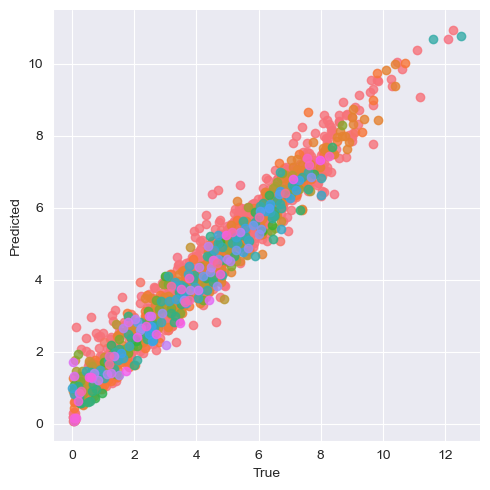

In [80]:
sns.lmplot(train_results_df, x='True', y='Predicted', hue='remainder__Molecule keywords', legend=False, fit_reg=False)

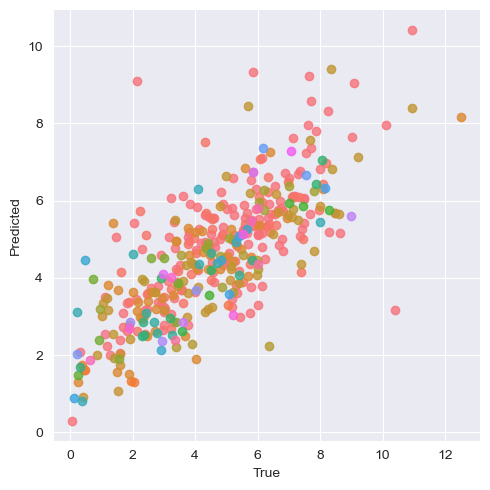

In [81]:
sns.lmplot(test_results_df, x='True', y='Predicted', hue='remainder__Molecule keywords', legend=False, fit_reg=False)

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(dye_device_family_df, activity_df['PCE'], test_size=0.2)

print(X_train.shape)

reg = RandomForestRegressor()
reg.fit(X_train, Y_train)

pred_train_PCE = reg.predict(X_train)
pred_test_PCE = reg.predict(X_test)

r2 = r2_score(Y_train, pred_train_PCE)
q2 = r2_score(Y_test, pred_test_PCE)

print(f'R2: {r2}, Q2: {q2}')

train_results_dict = {'True': Y_train, 'Predicted': pred_train_PCE}
test_results_dict = {'True': Y_test, 'Predicted': pred_test_PCE}

train_results_df = pd.DataFrame.from_dict(train_results_dict)
test_results_df = pd.DataFrame.from_dict(test_results_dict)

(1605, 1183)
R2: 0.940942733572976, Q2: 0.5465728717082687


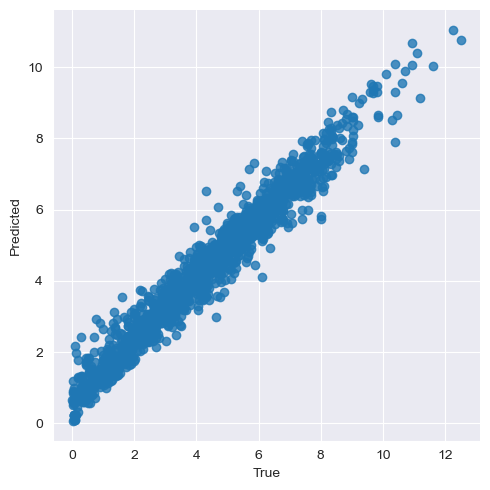

In [86]:
sns.lmplot(train_results_df, x='True', y='Predicted', legend=False, fit_reg=False)

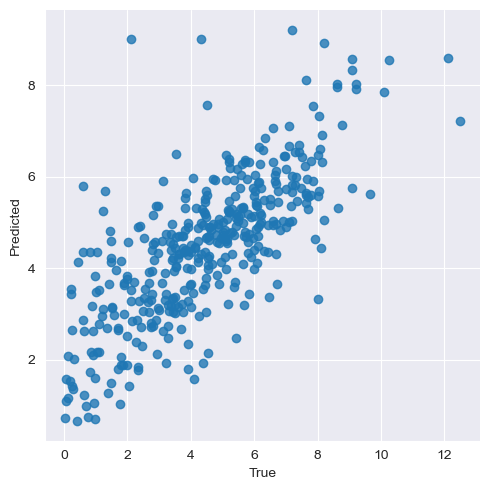

In [85]:
sns.lmplot(test_results_df, x='True', y='Predicted', legend=False, fit_reg=False)